In [1]:
#!pip install tensorflow

In [2]:
from Hopper import *
import tensorflow as tf
import numpy as np
import Prepper

%matplotlib inline

# Hopper

In [3]:
verbose = True
h = dbms(verbose=verbose)

DROP TABLE IF EXISTS i_ids;

CREATE TABLE i_ids (
	i_id TEXT NOT NULL,
	PRIMARY KEY (i_id)
);

DROP TABLE IF EXISTS i_windows;

CREATE TABLE i_windows (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

DROP TABLE IF EXISTS i_partitions;

CREATE TABLE i_partitions (
	i_id TEXT NOT NULL,
	partition TEXT NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

DROP TABLE IF EXISTS i_relcal;

CREATE TABLE i_relcal (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL
);



## Load Tables

In [4]:
_tc = table_config("characteristics_0", 
                  ["age", "sex", "eth", "bin_ldc", "job"], 
                  ["real", "bin", "ldc", "ldc", "hdc"],
                  has_times=False,
                  primary_key=True)
h.create_fvm_with_csv(_tc, "data/characteristics_0.csv", delimiter=',')


_tc = table_config("samples_0", 
                  ["SBP", "DBP", "type"], 
                  ["real", "real", "ldc"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_0.csv", delimiter=',')



_tc = table_config("samples_1", 
                  ["tmps", "hrs", "sbps", "rrs", "dbps", "sats", "wgts"],
                  ["real", "real", 'real', "real", "real", "real", "real"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_1.csv", delimiter=',')


_tc = table_config("samples_2", 
                  ["dx"],
                  ["hdc"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_2.csv", delimiter=',')



_tc = table_config("samples_3", 
                  ["outcome"],
                  ["bin"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_3.csv", delimiter=',')


_tc = table_config("samples_4", 
                  ["q"],
                  ["bin"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_4.csv", delimiter=',')


DROP TABLE IF EXISTS characteristics_0;

CREATE TABLE characteristics_0 (
	i_id TEXT NOT NULL,
	age REAL NOT NULL,
	sex TEXT NOT NULL,
	eth TEXT NOT NULL,
	bin_ldc TEXT NOT NULL,
	job TEXT NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

INSERT OR IGNORE INTO i_ids (i_id) VALUES (?);

INSERT  INTO characteristics_0 (i_id, age, sex, eth, bin_ldc, job) VALUES (?, ?, ?, ?, ?, ?);

CREATE INDEX i_index_characteristics_0_i_id ON characteristics_0(i_id);

CREATE INDEX i_index_characteristics_0_age ON characteristics_0(age);

CREATE INDEX i_index_characteristics_0_sex ON characteristics_0(sex);

CREATE INDEX i_index_characteristics_0_eth ON characteristics_0(eth);

CREATE INDEX i_index_characteristics_0_bin_ldc ON characteristics_0(bin_ldc);

CREATE INDEX i_index_characteristics_0_job ON characteristics_0(job);

10000 rows loaded

DROP TABLE IF EXISTS samples_0;

CREATE TABLE samples_0 (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL,
	SBP RE

## Window, Filter, Transform, Aggregate, Normalize Data

In [5]:
#h.dew_it(after_first=35)
h.dew_it(fit_normalization_via_sql_qds=False)

INSERT  INTO i_windows (i_id, i_st, i_et) VALUES (?, ?, ?);

gen_range_table_sql called: af=None, bf=None
INSERT OR IGNORE INTO i_windows 
SELECT * FROM (
	SELECT i_id, MIN(i_st) AS i_st, MAX(i_et) AS i_et
	FROM (
	    SELECT i_id, i_st, i_et
		FROM samples_0
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_1
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_2
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_3
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_4
		
	)
	GROUP BY i_id
);

INSERT  INTO i_partitions (i_id, partition) VALUES (?, ?);

INSERT OR IGNORE INTO i_partitions 
SELECT * FROM (
	SELECT i_id, CASE 
		 WHEN r <= 0.8 THEN "train" 
		 WHEN r <= 0.9 THEN "dev" 
		 WHEN r <= 1.0 THEN "test" 
		 ELSE "test" 
	END
	FROM (SELECT i_id, ABS(RANDOM())/(9223372036854775807.0) AS r FROM i_ids)
);

CREATE VIEW win_samples_0 AS
    SELECT samples_0.i_id,
	MAX(samples_0.i_st, i_windows.i_st) AS i_st,
	MIN(samples_0.i_et, i_windows.i_et) AS i_et,
	SBP,
	DBP,
	type
	FROM (
	    sample

SELECT AVG(sats) AS avg,
       SUM((sats-(SELECT AVG(sats) FROM i_partitions_train_win_samples_1))*
       (sats-(SELECT AVG(sats) FROM i_partitions_train_win_samples_1)))
       /(COUNT(sats)-1) AS var
FROM i_partitions_train_win_samples_1
;

SELECT AVG(wgts) AS avg,
       SUM((wgts-(SELECT AVG(wgts) FROM i_partitions_train_win_samples_1))*
       (wgts-(SELECT AVG(wgts) FROM i_partitions_train_win_samples_1)))
       /(COUNT(wgts)-1) AS var
FROM i_partitions_train_win_samples_1
;

SELECT COUNT(*) FROM i_partitions_train_win_samples_2;

SELECT dx, COUNT(*) AS n
FROM i_partitions_train_win_samples_2
GROUP BY dx
ORDER BY n DESC
;


SELECT COUNT(*) FROM i_partitions_train_win_samples_3;

SELECT outcome, COUNT(*) AS n
FROM i_partitions_train_win_samples_3
GROUP BY outcome
ORDER BY n DESC
;


SELECT COUNT(*) FROM i_partitions_train_win_samples_4;

SELECT q, COUNT(*) AS n
FROM i_partitions_train_win_samples_4
GROUP BY q
ORDER BY n DESC
;


SELECT min(i_st) AS i_st, max(i_et) AS i_et
FROM 

SELECT avg_tmps, min_tmps, max_tmps, avg_hrs, min_hrs, max_hrs, avg_sbps, min_sbps, max_sbps, avg_rrs, min_rrs, max_rrs, avg_dbps, min_dbps, max_dbps, avg_sats, min_sats, max_sats, avg_wgts, min_wgts, max_wgts, count
FROM agg_samples_1
;

SELECT count
FROM agg_samples_2
;

SELECT count
FROM agg_samples_3
;

SELECT count
FROM agg_samples_4
;

CREATE VIEW nrm_characteristics_0 AS
    SELECT i_id,
	(age-48.0)/0.0 as age,
	sex,
	eth_e0,
	eth_e1,
	eth_e2,
	eth_e3,
	eth_e4,
	eth_e5,
	eth__OTHER_,
	bin_ldc_A,
	bin_ldc_B,
	bin_ldc__OTHER_,
	job
	FROM ohe_characteristics_0
	
;

CREATE VIEW nrm_samples_0 AS
    SELECT i_id,
	i_st,
	i_et,
	(avg_SBP-86.6503598170221)/41.29184159553759 as avg_SBP,
	(min_SBP-86.86976326189745)/39.64463317462336 as min_SBP,
	(max_SBP-86.93051620862737)/39.69972686710985 as max_SBP,
	(avg_DBP-85.60696651458821)/36.830205514812455 as avg_DBP,
	(min_DBP-86.84832021150899)/39.82901094932715 as min_DBP,
	(max_DBP-79.48415264021995)/37.43161673451052 as max_DBP,
	avg_type_

# Prepper 

In [6]:
tfp = Prepper.tf_prepper(h)
tfp.features

['i_id',
 'i_duration',
 'characteristics_0/age',
 'characteristics_0/sex',
 'characteristics_0/eth_e0',
 'characteristics_0/eth_e1',
 'characteristics_0/eth_e2',
 'characteristics_0/eth_e3',
 'characteristics_0/eth_e4',
 'characteristics_0/eth_e5',
 'characteristics_0/eth__OTHER_',
 'characteristics_0/bin_ldc_A',
 'characteristics_0/bin_ldc_B',
 'characteristics_0/bin_ldc__OTHER_',
 'characteristics_0/job',
 'samples_0/avg_SBP',
 'samples_0/min_SBP',
 'samples_0/max_SBP',
 'samples_0/avg_DBP',
 'samples_0/min_DBP',
 'samples_0/max_DBP',
 'samples_0/avg_type_c0',
 'samples_0/avg_type_c1',
 'samples_0/avg_type_c2',
 'samples_0/avg_type_c3',
 'samples_0/avg_type_c4',
 'samples_0/avg_type__OTHER_',
 'samples_0/count',
 'samples_1/avg_tmps',
 'samples_1/min_tmps',
 'samples_1/max_tmps',
 'samples_1/avg_hrs',
 'samples_1/min_hrs',
 'samples_1/max_hrs',
 'samples_1/avg_sbps',
 'samples_1/min_sbps',
 'samples_1/max_sbps',
 'samples_1/avg_rrs',
 'samples_1/min_rrs',
 'samples_1/max_rrs',
 'sam

## Fit Prepper to Desired Task

In [7]:
tfp.fit(offsets=[0, 1, 2, 4, 5], label_fns=["samples_3/avg_outcome", ], partition="train")

SELECT job
FROM i_partitions_train_nrm_characteristics_0
;

SELECT concat_dx
FROM i_partitions_train_nrm_samples_2
;



## Make Model

In [8]:
d0 = tf.keras.layers.Dense(units=32, name="encode")
r0 = tf.keras.layers.LSTM(units=32,return_sequences=True, name="RNN_0")
r1 = tf.keras.layers.LSTM(units=16,return_sequences=True, name="RNN_1")

final_model = tfp.build_model(middle_layer_list=[d0, r0, r1])
final_model.compile(loss="binary_crossentropy")
final_model.summary()

Model: "final"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
characteristics_0/job (InputLay [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
samples_2/concat_dx (InputLayer [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
emb_characteristics_0/job (Embe (None, None, 1, 6)   4866        characteristics_0/job[0][0]      
__________________________________________________________________________________________________
emb_samples_2/concat_dx (Embedd (None, None, 5, 10)  80480       samples_2/concat_dx[0][0]        
______________________________________________________________________________________________

In [9]:
d0 = tf.keras.layers.Dense(units=32, name="encode")
r0 = tf.keras.layers.LSTM(units=32,return_sequences=True, name="RNN_0")
r1 = tf.keras.layers.LSTM(units=16,return_sequences=True, name="RNN_1")

final_wo_model = tfp.build_model(middle_layer_list=[d0, r0, r1], ignore_fns=['samples_4/avg_q', 'samples_4/count'])
final_wo_model.compile(loss="binary_crossentropy")
final_wo_model.summary()

Model: "final"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
characteristics_0/job (InputLay [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
samples_2/concat_dx (InputLayer [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
emb_characteristics_0/job (Embe (None, None, 1, 6)   4866        characteristics_0/job[0][0]      
__________________________________________________________________________________________________
emb_samples_2/concat_dx (Embedd (None, None, 5, 10)  80480       samples_2/concat_dx[0][0]        
______________________________________________________________________________________________

## Make TensorFlow Dataset

In [10]:
ds = tfp.transform_to_ds()

SELECT *
FROM i_windows
;

SELECT *
FROM nrm_characteristics_0
;

SELECT *
FROM nrm_samples_0
;

SELECT *
FROM nrm_samples_1
;

SELECT *
FROM nrm_samples_2
;

SELECT *
FROM nrm_samples_3
;

SELECT *
FROM nrm_samples_4
;

SELECT *
FROM i_partitions
;



# Train Model

In [11]:
final_model.fit(ds["train"], epochs=1, validation_data=ds["dev"])
#final_model.fit(ds["test"], epochs=1)

125/125 [==============================] - 301s 2s/step - loss: 0.4877 - val_loss: 0.3648


In [12]:
final_model.fit(ds["train"], epochs=1, validation_data=ds["dev"])
#final_wo_model.fit(ds["test"], epochs=1)

125/125 [==============================] - 270s 2s/step - loss: 0.3017 - val_loss: 0.2616


# Operating Characteristics

Done: 125

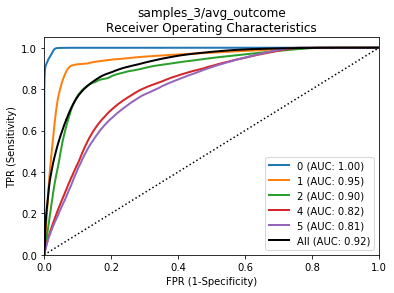

samples_3/avg_outcome (0)
	Brier: 0.033
	Precision: 0.981
	Recall: 0.952
	F1: 0.966

samples_3/avg_outcome (1)
	Brier: 0.079
	Precision: 0.917
	Recall: 0.890
	F1: 0.903

samples_3/avg_outcome (2)
	Brier: 0.128
	Precision: 0.858
	Recall: 0.780
	F1: 0.817

samples_3/avg_outcome (4)
	Brier: 0.176
	Precision: 0.765
	Recall: 0.573
	F1: 0.655

samples_3/avg_outcome (5)
	Brier: 0.181
	Precision: 0.736
	Recall: 0.579
	F1: 0.648

samples_3/avg_outcome (All)
	Brier: 0.119
	Precision: 0.862
	Recall: 0.758
	F1: 0.807



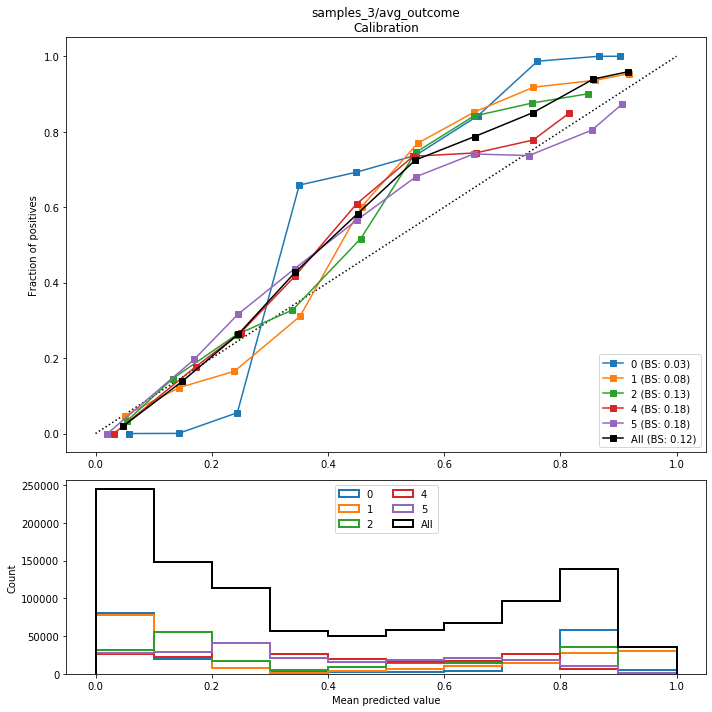

In [13]:
p_train = Prepper.population(ds["train"], tfp, final_model)
p_train.roc_curves()
p_train.calibration_curves()

Done: 29

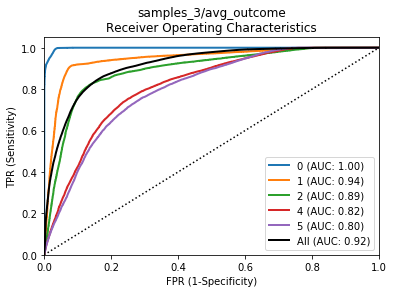

samples_3/avg_outcome (0)
	Brier: 0.034
	Precision: 0.981
	Recall: 0.950
	F1: 0.965

samples_3/avg_outcome (1)
	Brier: 0.081
	Precision: 0.916
	Recall: 0.888
	F1: 0.902

samples_3/avg_outcome (2)
	Brier: 0.130
	Precision: 0.859
	Recall: 0.777
	F1: 0.816

samples_3/avg_outcome (4)
	Brier: 0.179
	Precision: 0.761
	Recall: 0.561
	F1: 0.646

samples_3/avg_outcome (5)
	Brier: 0.184
	Precision: 0.731
	Recall: 0.566
	F1: 0.638

samples_3/avg_outcome (All)
	Brier: 0.122
	Precision: 0.861
	Recall: 0.752
	F1: 0.803



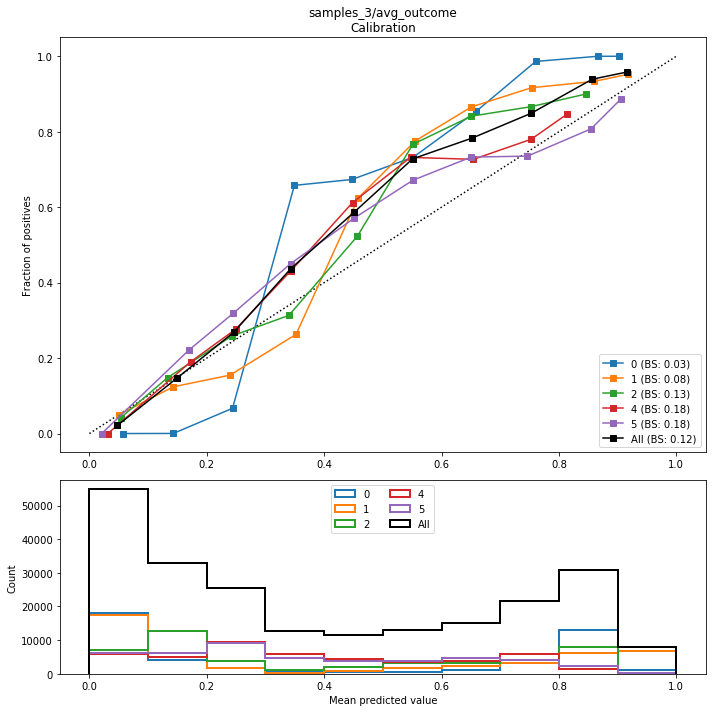

In [14]:
p_dev = Prepper.population(ds["dev"], tfp, final_model)
p_dev.roc_curves()
p_dev.calibration_curves()

Done: 4

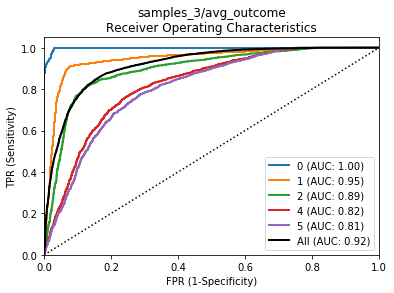

samples_3/avg_outcome (0)
	Brier: 0.034
	Precision: 0.978
	Recall: 0.949
	F1: 0.963

samples_3/avg_outcome (1)
	Brier: 0.079
	Precision: 0.917
	Recall: 0.891
	F1: 0.904

samples_3/avg_outcome (2)
	Brier: 0.129
	Precision: 0.855
	Recall: 0.782
	F1: 0.817

samples_3/avg_outcome (4)
	Brier: 0.176
	Precision: 0.771
	Recall: 0.569
	F1: 0.655

samples_3/avg_outcome (5)
	Brier: 0.181
	Precision: 0.738
	Recall: 0.579
	F1: 0.648

samples_3/avg_outcome (All)
	Brier: 0.120
	Precision: 0.862
	Recall: 0.756
	F1: 0.806



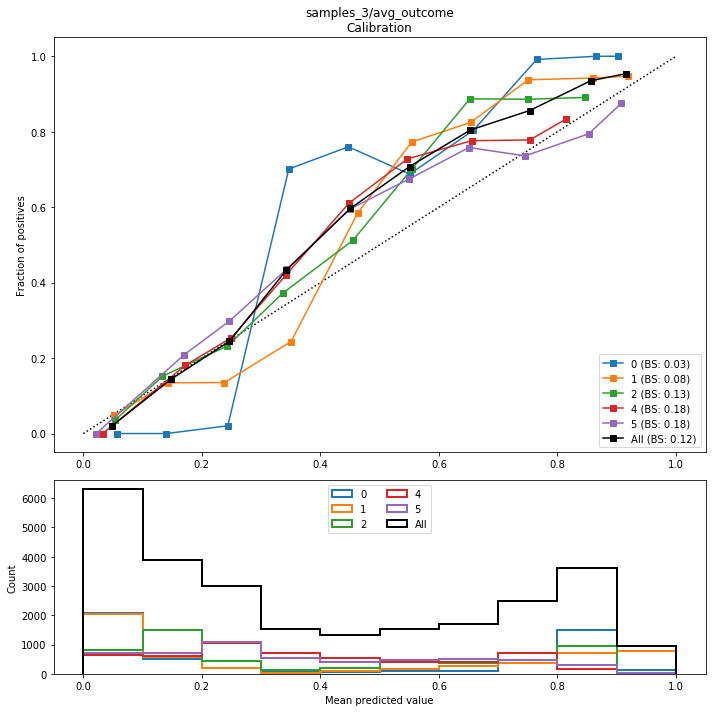

In [15]:
p_test = Prepper.population(ds["test"], tfp, final_model)
p_test.roc_curves()
p_test.calibration_curves()

Done: 125

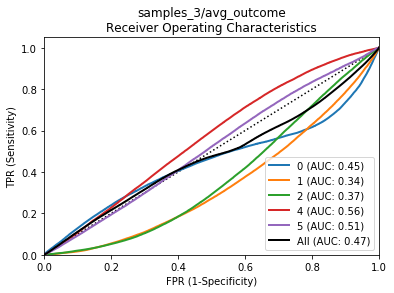

samples_3/avg_outcome (0)
	Brier: 0.251
	Precision: 0.404
	Recall: 0.557
	F1: 0.469

samples_3/avg_outcome (1)
	Brier: 0.256
	Precision: 0.113
	Recall: 0.001
	F1: 0.003

samples_3/avg_outcome (2)
	Brier: 0.254
	Precision: 0.122
	Recall: 0.004
	F1: 0.008

samples_3/avg_outcome (4)
	Brier: 0.254
	Precision: 0.439
	Recall: 1.000
	F1: 0.611

samples_3/avg_outcome (5)
	Brier: 0.253
	Precision: 0.435
	Recall: 0.918
	F1: 0.590

samples_3/avg_outcome (All)
	Brier: 0.254
	Precision: 0.427
	Recall: 0.489
	F1: 0.456



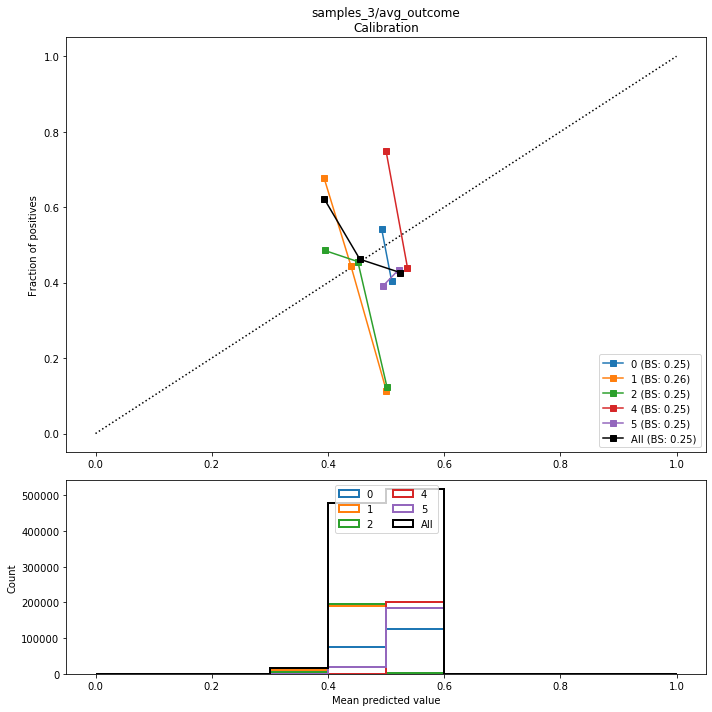

In [16]:
p_train = Prepper.population(ds["train"], tfp, final_wo_model)
p_train.roc_curves()
p_train.calibration_curves()

Done: 29

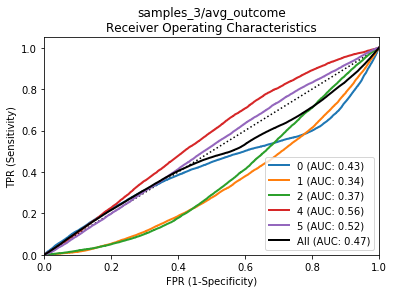

samples_3/avg_outcome (0)
	Brier: 0.252
	Precision: 0.400
	Recall: 0.539
	F1: 0.459

samples_3/avg_outcome (1)
	Brier: 0.257
	Precision: 0.051
	Recall: 0.001
	F1: 0.001

samples_3/avg_outcome (2)
	Brier: 0.255
	Precision: 0.106
	Recall: 0.003
	F1: 0.007

samples_3/avg_outcome (4)
	Brier: 0.254
	Precision: 0.442
	Recall: 1.000
	F1: 0.613

samples_3/avg_outcome (5)
	Brier: 0.253
	Precision: 0.437
	Recall: 0.923
	F1: 0.594

samples_3/avg_outcome (All)
	Brier: 0.254
	Precision: 0.428
	Recall: 0.486
	F1: 0.455



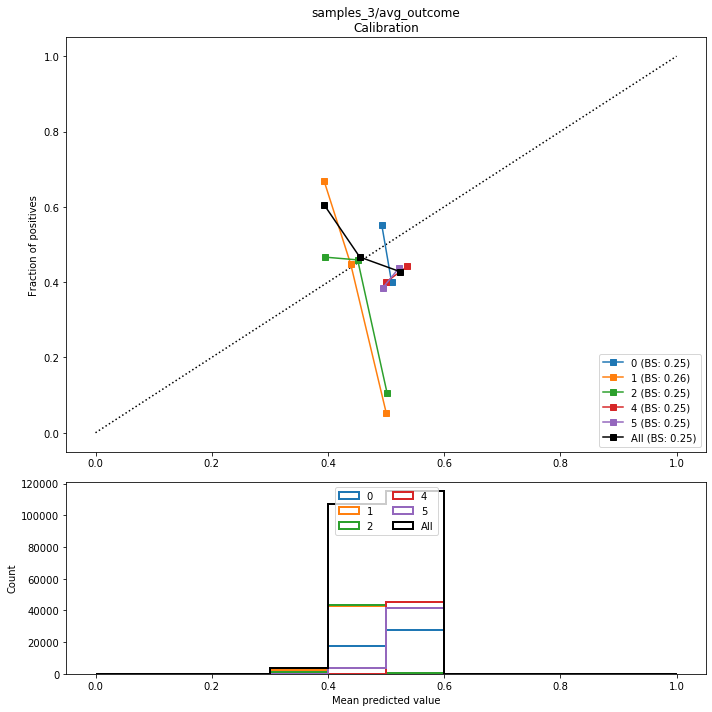

In [17]:
p_dev = Prepper.population(ds["dev"], tfp, final_wo_model)
p_dev.roc_curves()
p_dev.calibration_curves()

Done: 4

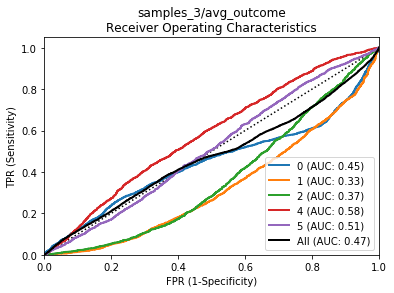

samples_3/avg_outcome (0)
	Brier: 0.251
	Precision: 0.401
	Recall: 0.569
	F1: 0.470

samples_3/avg_outcome (1)
	Brier: 0.257
	Precision: 0.109
	Recall: 0.002
	F1: 0.004

samples_3/avg_outcome (2)
	Brier: 0.255
	Precision: 0.136
	Recall: 0.005
	F1: 0.010

samples_3/avg_outcome (4)
	Brier: 0.254
	Precision: 0.441
	Recall: 1.000
	F1: 0.612

samples_3/avg_outcome (5)
	Brier: 0.253
	Precision: 0.439
	Recall: 0.922
	F1: 0.595

samples_3/avg_outcome (All)
	Brier: 0.254
	Precision: 0.427
	Recall: 0.493
	F1: 0.458



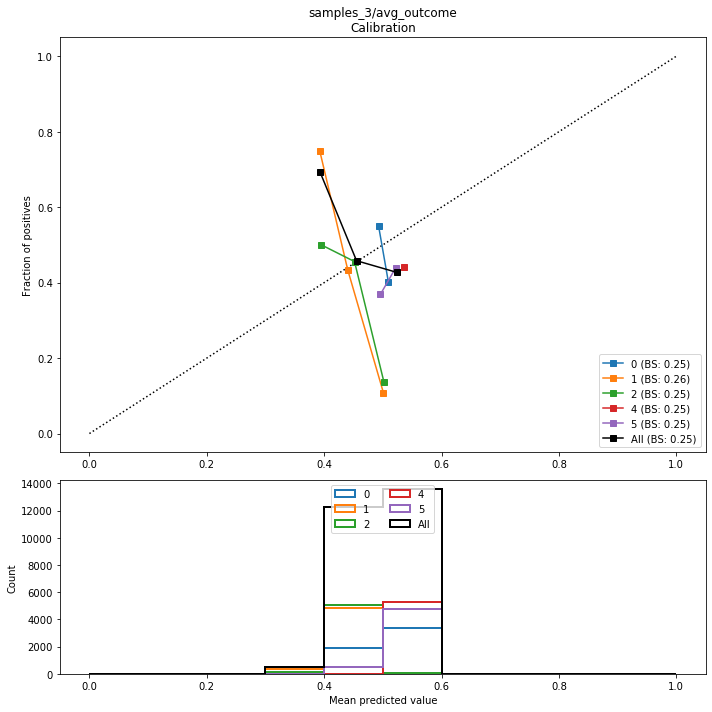

In [18]:
p_test = Prepper.population(ds["test"], tfp, final_wo_model)
p_test.roc_curves()
p_test.calibration_curves()

# Examine Individual Trajectories

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 1. 1. 1.]
[0.] [0. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]



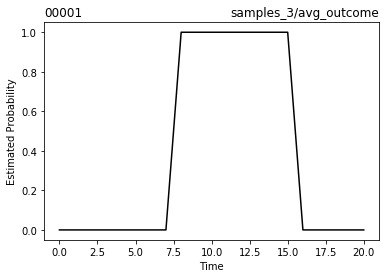

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.] [0.25 0.25 0.3  0.31 0.31]
[0.] [0. 0. 0. 0. 0.] [0.09 0.08 0.15 0.19 0.19]
[0.] [0. 0. 0. 0. 0.] [0.06 0.06 0.12 0.19 0.18]
[0.] [0. 0. 0. 0. 1.] [0.05 0.04 0.1  0.19 0.17]
[0.] [0. 0. 0. 1. 1.] [0.04 0.04 0.09 0.19 0.17]
[0.] [0. 0. 0. 1. 1.] [0.04 0.04 0.08 0.2  0.18]
[0.] [0. 0. 1. 1. 1.] [0.04 0.03 0.08 0.19 0.19]
[0.] [0. 1. 1. 1. 1.] [0.04 0.04 0.09 0.23 0.26]
[1.] [1. 1. 1. 1. 1.] [0.38 0.61 0.59 0.59 0.81]
[1.] [1. 1. 1. 1. 1.] [0.8  0.89 0.82 0.79 0.86]
[1.] [1. 1. 1. 1. 1.] [0.88 0.92 0.86 0.78 0.79]
[1.] [1. 1. 1. 1. 0.] [0.89 0.92 0.85 0.76 0.72]
[1.] [1. 1. 1. 0. 0.] [0.89 0.9  0.83 0.72 0.66]
[1.] [1. 1. 1. 0. 0.] [0.88 0.88 0.8  0.67 0.6 ]
[1.] [1. 1. 0. 0. 0.] [0.87 0.86 0.76 0.62 0.54]
[1.] [1. 0. 0. 0. 0.] [0.85 0.82 0.71 0.55 0.45]
[0.] [0. 0. 0. 0. 0.] [0.34 0.17 0.22 0.18 0.08]
[0.] [0. 0. 0. 0. 0.] [0.08 0.03 0.06 0.04 0.02]
[0.] [0. 0. 0. 0. 0.] [0.05 0.01 0.04 0.02 0.01]
[0.] [0. 0. 0. 0. 0.] [0.04 0.01 0.03 0.

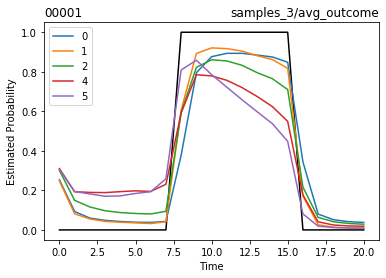

In [19]:
e = Prepper.entity("00001", tfp)
e.print_labels()
e.plot()
e.predict(final_model)
e.print_labels()
e.plot()

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 1. 1. 1.]
[0.] [0. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]



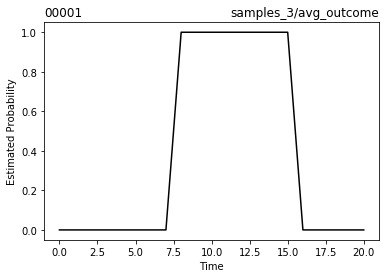

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.] [0.5 0.5 0.5 0.5 0.5]
[0.] [0. 0. 0. 0. 0.] [0.5  0.48 0.49 0.51 0.51]
[0.] [0. 0. 0. 0. 0.] [0.5  0.46 0.49 0.52 0.51]
[0.] [0. 0. 0. 0. 1.] [0.5  0.46 0.48 0.52 0.51]
[0.] [0. 0. 0. 1. 1.] [0.5  0.45 0.47 0.52 0.52]
[0.] [0. 0. 0. 1. 1.] [0.5  0.45 0.47 0.52 0.52]
[0.] [0. 0. 1. 1. 1.] [0.49 0.45 0.46 0.52 0.52]
[0.] [0. 1. 1. 1. 1.] [0.5  0.44 0.46 0.52 0.52]
[1.] [1. 1. 1. 1. 1.] [0.5  0.43 0.46 0.53 0.52]
[1.] [1. 1. 1. 1. 1.] [0.5  0.42 0.46 0.53 0.53]
[1.] [1. 1. 1. 1. 1.] [0.5  0.41 0.46 0.54 0.53]
[1.] [1. 1. 1. 1. 0.] [0.5  0.41 0.45 0.54 0.53]
[1.] [1. 1. 1. 0. 0.] [0.5  0.41 0.45 0.54 0.53]
[1.] [1. 1. 1. 0. 0.] [0.5  0.41 0.44 0.54 0.54]
[1.] [1. 1. 0. 0. 0.] [0.5  0.4  0.44 0.55 0.54]
[1.] [1. 0. 0. 0. 0.] [0.5  0.4  0.43 0.55 0.54]
[0.] [0. 0. 0. 0. 0.] [0.5  0.39 0.43 0.55 0.54]
[0.] [0. 0. 0. 0. 0.] [0.49 0.4  0.43 0.54 0.54]
[0.] [0. 0. 0. 0. 0.] [0.49 0.4  0.43 0.54 0.54]
[0.] [0. 0. 0. 0. 0.] [0.49 0.41 0.43 0.54 0.

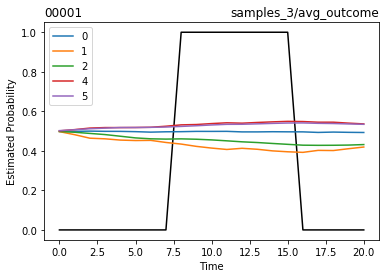

In [20]:
e = Prepper.entity("00001", tfp)
e.print_labels()
e.plot()
e.predict(final_wo_model)
e.print_labels()
e.plot()

# Additional Feature Development

In [21]:
idx="00000"
s_X, s_Y = tfp.get_specific_XY(idx)

In [22]:
s_Y_h = final_model.predict(s_X)

for i, lb in enumerate(tfp.label_fns):
    print(s_Y_h[i].shape, s_Y[lb].shape)

(21, 5) (5, 21, 1)


In [23]:
np.set_printoptions(precision=3)
for fn, v in s_X.items():
    print(fn, "\n", np.squeeze(np.array(v)))

i_id 
 [b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000'
 b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000'
 b'00000' b'00000' b'00000' b'00000' b'00000']
i_duration 
 [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
characteristics_0/age 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/sex 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
characteristics_0/eth_e0 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e1 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e2 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e3 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
characteristics_0/eth_e4 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e5 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [24]:
for i in ds["train"].take(1):
    x, y = i
    for k, v in x.items():
        print(k, '\n', v.shape, '\n')
    
    for i, _y in enumerate(y):
        print("y[%s]" %(i), '\n', _y.shape, '\n')

print("Avg y value: ", np.mean(y))

i_id 
 (64, 37, 1) 

i_duration 
 (64, 37, 1) 

characteristics_0/age 
 (64, 37, 1) 

characteristics_0/sex 
 (64, 37, 1) 

characteristics_0/eth_e0 
 (64, 37, 1) 

characteristics_0/eth_e1 
 (64, 37, 1) 

characteristics_0/eth_e2 
 (64, 37, 1) 

characteristics_0/eth_e3 
 (64, 37, 1) 

characteristics_0/eth_e4 
 (64, 37, 1) 

characteristics_0/eth_e5 
 (64, 37, 1) 

characteristics_0/eth__OTHER_ 
 (64, 37, 1) 

characteristics_0/bin_ldc_A 
 (64, 37, 1) 

characteristics_0/bin_ldc_B 
 (64, 37, 1) 

characteristics_0/bin_ldc__OTHER_ 
 (64, 37, 1) 

characteristics_0/job 
 (64, 37, 1) 

samples_0/avg_SBP 
 (64, 37, 1) 

samples_0/min_SBP 
 (64, 37, 1) 

samples_0/max_SBP 
 (64, 37, 1) 

samples_0/avg_DBP 
 (64, 37, 1) 

samples_0/min_DBP 
 (64, 37, 1) 

samples_0/max_DBP 
 (64, 37, 1) 

samples_0/avg_type_c0 
 (64, 37, 1) 

samples_0/avg_type_c1 
 (64, 37, 1) 

samples_0/avg_type_c2 
 (64, 37, 1) 

samples_0/avg_type_c3 
 (64, 37, 1) 

samples_0/avg_type_c4 
 (64, 37, 1) 

samples_0/avg_